<a href="https://colab.research.google.com/github/Krishnan-Raghavan/Packt/blob/main/StableDiffusionChapter12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Apr 12 12:57:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install diffusers
!pip install transformers scipy ftfy accelerate ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 590.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

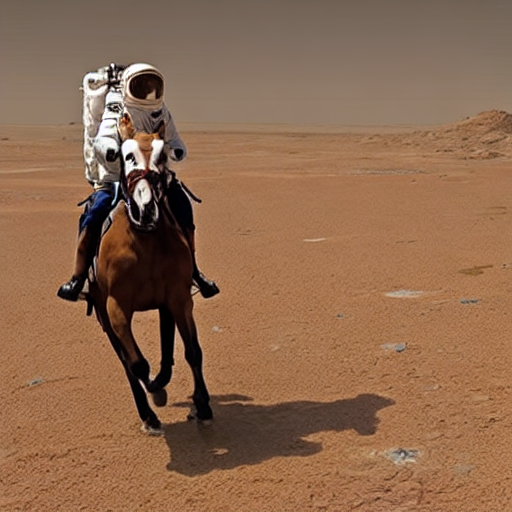

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5"
    , torch_dtype=torch.float16)
pipe.to("cuda")
prompt = "a photo of an astronaut riding a horse on mars,blazing fast, wind and sand moving back"
image = pipe(
    prompt, num_inference_steps=30
).images[0]
image

model_index.json:   0%|          | 0.00/584 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/755 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/630 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

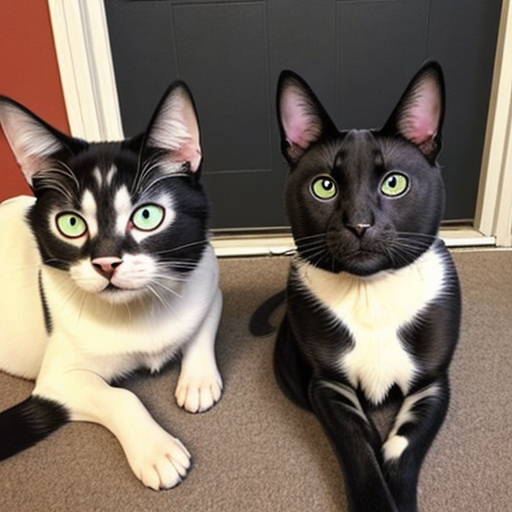

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
pipeline = StableDiffusionPipeline.from_pretrained(
    "stablediffusionapi/deliberate-v2",
    torch_dtype = torch.float16,
    safety_checker = None
).to("cuda:0")
image = pipeline(
    prompt = "A photo with half cat and half dog"
    , generator = torch.Generator("cuda:0").manual_seed(3)
).images[0]
image

In [ ]:
!pip install compel

In [ ]:
import compel

In [ ]:
from compel import Compel
compel = Compel(
    tokenizer       = pipeline.tokenizer
    , text_encoder  = pipeline.text_encoder
)

In [ ]:
prompt = '("A photo of cat", "A photo of dog").blend(0.5, 0.5)'
prompt_embeds = compel(prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

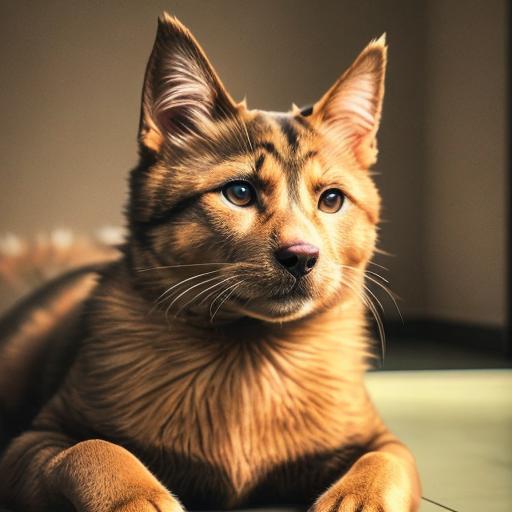

In [ ]:
image = pipeline(
    prompt_embeds   = prompt_embeds
    , generator     = torch.Generator("cuda:0").manual_seed(1)
).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

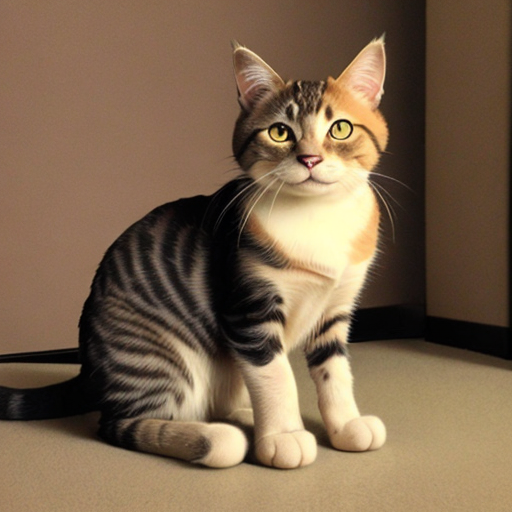

In [ ]:
prompt = '("A photo of cat", "A photo of dog").blend(0.7, 0.3)'
prompt_embeds = compel(prompt)
image = pipeline(
    prompt_embeds   = prompt_embeds
    , generator     = torch.Generator("cuda:0").manual_seed(1)
).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

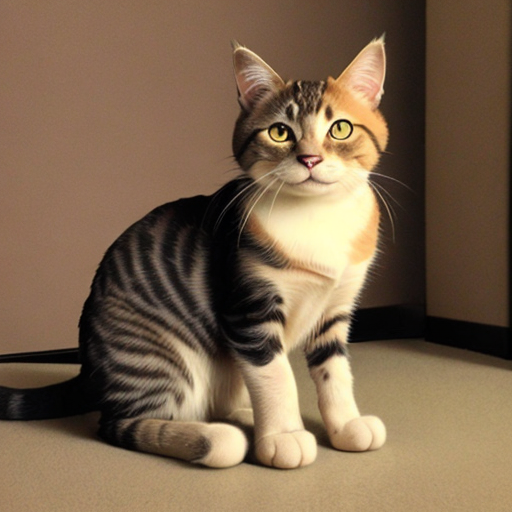

In [ ]:
prompt = '("A photo of cat", "A photo of dog").blend(0.7, 0.3)'
prompt_embeds = compel(prompt)
image = pipeline(
    prompt_embeds   = prompt_embeds
    , generator     = torch.Generator("cuda:0").manual_seed(1)
).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

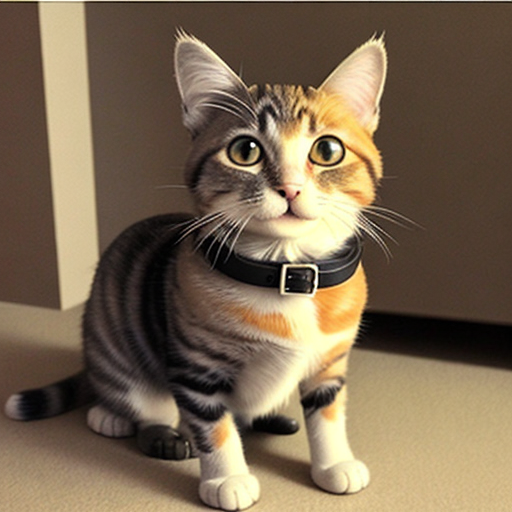

In [ ]:
prompt = '[A photo of cat:A photo of dog:0.5]'
prompt_embeds = compel(prompt)
image = pipeline(
    prompt_embeds   = prompt_embeds
    , generator     = torch.Generator("cuda:0").manual_seed(1)
).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

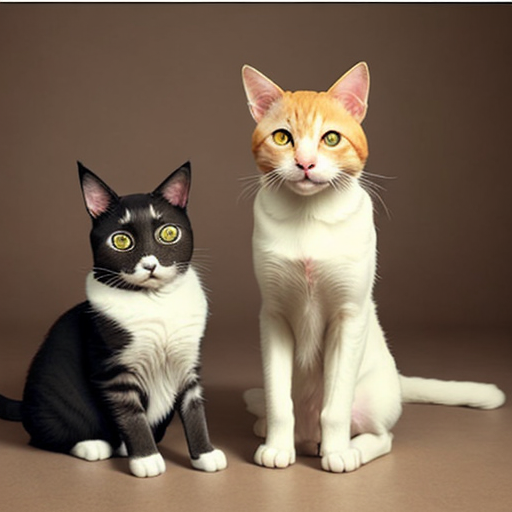

In [ ]:
prompt = '[A photo of cat|A photo of dog]'
prompt_embeds = compel(prompt)
image = pipeline(
    prompt_embeds   = prompt_embeds
    , generator     = torch.Generator("cuda:0").manual_seed(1)
).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

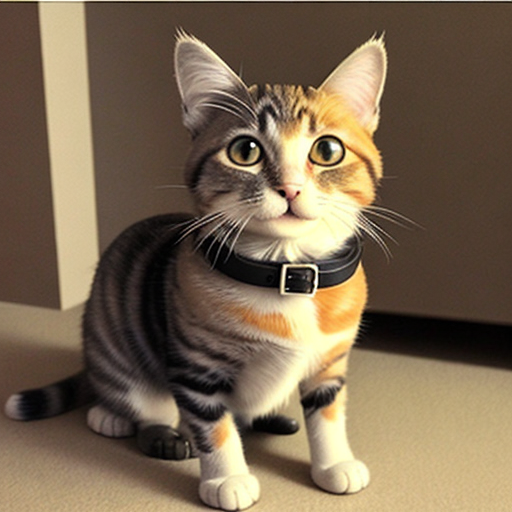

In [ ]:
prompt = '[A photo of cat:A photo of dog:0.5]'
prompt_embeds = compel(prompt)
image = pipeline(
    prompt_embeds   = prompt_embeds
    , generator     = torch.Generator("cuda:0").manual_seed(1)
).images[0]
image

In [ ]:
!pip install -U lark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 1.5 MB/s eta 0:00:00


In [ ]:
import lark
schedule_parser = lark.Lark(r"""
!start: (prompt | /[][():]/+)*
prompt: (emphasized | scheduled | alternate | plain | WHITESPACE)*
!emphasized: "(" prompt ")"
        | "(" prompt ":" prompt ")"
        | "[" prompt "]"
scheduled: "[" [prompt ":"] prompt ":" [WHITESPACE] NUMBER "]"
alternate: "[" prompt ("|" prompt)+ "]"
WHITESPACE: /\s+/
plain: /([^\\\[\]():|]|\\.)+/
%import common.SIGNED_NUMBER -> NUMBER
""")

In [ ]:
def get_learned_conditioning_prompt_schedules(prompts, steps):
    def collect_steps(steps, tree):
        l = [steps]
        class CollectSteps(lark.Visitor):
            def scheduled(self, tree):
                tree.children[-1] = float(tree.children[-1])
                if tree.children[-1] < 1:
                    tree.children[-1] *= steps
                tree.children[-1] = min(steps, int(tree.children[-1]))
                l.append(tree.children[-1])
            def alternate(self, tree):
                l.extend(range(1, steps+1))
        CollectSteps().visit(tree)
        return sorted(set(l))

    def at_step(step, tree):
        class AtStep(lark.Transformer):
            def scheduled(self, args):
                before, after, _, when = args
                yield before or () if step <= when else after
            def alternate(self, args):
                yield next(args[(step - 1)%len(args)])
            def start(self, args):
                def flatten(x):
                    if type(x) == str:
                        yield x
                    else:
                        for gen in x:
                            yield from flatten(gen)
                return ''.join(flatten(args))
            def plain(self, args):
                yield args[0].value
            def __default__(self, data, children, meta):
                for child in children:
                    yield child
        return AtStep().transform(tree)

    def get_schedule(prompt):
        try:
            tree = schedule_parser.parse(prompt)
        except lark.exceptions.LarkError as e:
            if 0:
                import traceback
                traceback.print_exc()
            return [[steps, prompt]]
        return [[t, at_step(t, tree)] for t in collect_steps(steps, tree)]

    promptdict = {prompt: get_schedule(prompt) for prompt in set(prompts)}
    return [promptdict[prompt] for prompt in prompts]

In [ ]:
steps = 10
g = lambda p: get_learned_conditioning_prompt_schedules([p], steps)[0]

In [ ]:
g("cat")

[[10, 'cat']]

In [ ]:
[[10, 'cat']]

[[10, 'cat']]

In [ ]:
g('[cat:dog:0.5]')

[[5, 'cat'], [10, 'dog']]

In [ ]:
[[5, 'cat'], [10, 'dog']]

[[5, 'cat'], [10, 'dog']]

In [ ]:
g('[cat|dog]')

[[1, 'cat'],
 [2, 'dog'],
 [3, 'cat'],
 [4, 'dog'],
 [5, 'cat'],
 [6, 'dog'],
 [7, 'cat'],
 [8, 'dog'],
 [9, 'cat'],
 [10, 'dog']]

In [ ]:
def parse_scheduled_prompts(text, steps=10):
    text = text.strip()
    parse_result = None
    try:
        parse_result = get_learned_conditioning_prompt_schedules(
            [text],
            steps = steps
        )[0]
    except Exception as e:
        print(e)

    if len(parse_result) == 1:
        return parse_result

    prompts_list = []

    for i in range(steps):
        current_prompt_step, current_prompt_content = parse_result[0][0],parse_result[0][1]
        step = i + 1
        if step < current_prompt_step:
            prompts_list.append(current_prompt_content)
            continue

        if step == current_prompt_step:
            prompts_list.append(current_prompt_content)
            parse_result.pop(0)

    return prompts_list

In [ ]:
prompt_list = parse_scheduled_prompts("[cat:dog:0.5]")
prompt_list

['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog']

In [ ]:
prompt_embeds = self._encode_prompt(
    prompt,
    device,
    num_images_per_prompt,
    do_classifier_free_guidance,
    negative_prompt,
    negative_prompt_embeds=negative_prompt_embeds,
)

NameError: name 'self' is not defined

In [ ]:
from typing import List, Callable, Dict, Any
from torch import Generator,FloatTensor
from diffusers.pipelines.stable_diffusion import StableDiffusionPipelineOutput
from diffusers import StableDiffusionPipeline,EulerDiscreteScheduler

class StableDiffusionPipeline_EXT(StableDiffusionPipeline):
    @torch.no_grad()
    def scheduler_call(
        self
        , prompt: str | List[str] = None
        , height: int | None = 512
        , width: int | None = 512
        , num_inference_steps: int = 50
        , guidance_scale: float = 7.5
        , negative_prompt: str | List[str] | None = None
        , num_images_per_prompt: int | None = 1
        , eta: float = 0
        , generator: Generator | List[Generator] | None = None
        , latents: FloatTensor | None = None
        , prompt_embeds: FloatTensor | None = None
        , negative_prompt_embeds: FloatTensor | None = None
        , output_type: str | None = "pil"
        , callback: Callable[[int, int, FloatTensor], None] | None = None
        , callback_steps: int = 1
        , cross_attention_kwargs: Dict[str, Any] | None = None
    ):
        ...
        extra_step_kwargs = self.prepare_extra_step_kwargs(generator, eta)
        num_warmup_steps = len(timesteps) - num_inference_steps * self.scheduler.order
        with self.progress_bar(total=num_inference_steps) as progress_bar:
            for i, t in enumerate(timesteps):
                # AZ code to enable Prompt Scheduling, will only function when
                # when there is a prompt_embeds_l provided.
                prompt_embeds_l_len = len(embedding_list)
                if prompt_embeds_l_len > 0:
                    # ensure no None prompt will be used
                    pe_index = (i)%prompt_embeds_l_len
                    prompt_embeds = embedding_list[pe_index]

                # expand the latents if we are doing classifier free guidance
                latent_model_input = torch.cat([latents] * 2) if do_classifier_free_guidance else latents
                latent_model_input = self.scheduler.scale_model_input(latent_model_input, t)

                # predict the noise residual
                noise_pred = self.unet(
                    latent_model_input,
                    t,
                    encoder_hidden_states=prompt_embeds,
                    cross_attention_kwargs=cross_attention_kwargs,
                ).sample

                # perform guidance
                if do_classifier_free_guidance:
                    noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
                    noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

                # compute the previous noisy sample x_t -> x_t-1
                latents = self.scheduler.step(noise_pred, t, latents, **extra_step_kwargs).prev_sample

                # call the callback, if provided
                if i == len(timesteps) - 1 or ((i + 1) > num_warmup_steps and (i + 1) % self.scheduler.order == 0):
                    progress_bar.update()
                    if callback is not None and i % callback_steps == 0:
                        callback(i, t, latents)

        if output_type == "latent":
            image = latents
        elif output_type == "pil":
            # 8. Post-processing
            image = self.decode_latents(latents)
            image = self.numpy_to_pil(image)
        else:
            # 8. Post-processing
            image = self.decode_latents(latents)

        if hasattr(self, "final_offload_hook") and self.final_offload_hook is not None:
            self.final_offload_hook.offload()

        return StableDiffusionPipelineOutput(images=image)

In [ ]:
if self.scheduler._class_name == "PNDMScheduler":
    self.scheduler = EulerDiscreteScheduler.from_config(
        self.scheduler.config
    )

NameError: name 'self' is not defined

In [ ]:
device = self._execution_device
do_classifier_free_guidance = guidance_scale > 1.0

NameError: name 'self' is not defined

In [ ]:
prompt_list = parse_scheduled_prompts(prompt)

In [ ]:
embedding_list = []
if len(prompt_list) == 1:
    prompt_embeds = self._encode_prompt(
        prompt,
        device,
        num_images_per_prompt,
        do_classifier_free_guidance,
        negative_prompt,
        negative_prompt_embeds=negative_prompt_embeds,
    )
else:
    for prompt in prompt_list:
        prompt_embeds = self._encode_prompt(
            prompt,
            device,
            num_images_per_prompt,
            do_classifier_free_guidance,
            negative_prompt,
            negative_prompt_embeds=negative_prompt_embeds,
        )
        embedding_list.append(prompt_embeds)

NameError: name 'self' is not defined

In [ ]:
self.scheduler.set_timesteps(num_inference_steps, device=device)
timesteps = self.scheduler.timesteps

NameError: name 'self' is not defined

In [ ]:
num_channels_latents = self.unet.in_channels
batch_size = 1
latents = self.prepare_latents(
    batch_size * num_images_per_prompt,
    num_channels_latents,
    height,
    width,
    prompt_embeds.dtype,
    device,
    generator,
    latents,
)

NameError: name 'self' is not defined

In [ ]:
num_warmup_steps = len(timesteps) - num_inference_steps * self.scheduler.order
with self.progress_bar(total=num_inference_steps) as progress_bar:
    for i, t in enumerate(timesteps):
        # custom code to enable Prompt Scheduling, will only function when
        # when there is a prompt_embeds_l provided.
        prompt_embeds_l_len = len(embedding_list)
        if prompt_embeds_l_len > 0:
            # ensure no None prompt will be used
            pe_index = (i)%prompt_embeds_l_len
            prompt_embeds = embedding_list[pe_index]

        # expand the latents if we are doing classifier free guidance
        latent_model_input = torch.cat([latents] * 2) if do_classifier_free_guidance else latents
        latent_model_input = self.scheduler.scale_model_input(latent_model_input, t)

        # predict the noise residual
        noise_pred = self.unet(
            latent_model_input,
            t,
            encoder_hidden_states=prompt_embeds,
            cross_attention_kwargs=cross_attention_kwargs,
        ).sample

        # perform guidance
        if do_classifier_free_guidance:
            noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
            noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

        # compute the previous noisy sample x_t -> x_t-1
        latents = self.scheduler.step(noise_pred, t, latents).prev_sample

        # call the callback, if provided
        if i == len(timesteps) - 1 or ((i + 1) > num_warmup_steps and (i + 1) % self.scheduler.order == 0):
            progress_bar.update()
            if callback is not None and i % callback_steps == 0:
                callback(i, t, latents)

NameError: name 'timesteps' is not defined

In [ ]:
image = self.decode_latents(latents)
image = self.numpy_to_pil(image)
return StableDiffusionPipelineOutput(images=image, nsfw_content_detected=None)

NameError: name 'self' is not defined

In [ ]:
pipeline = StableDiffusionPipeline_EXT.from_pretrained(
    "stablediffusionapi/deliberate-v2",
    torch_dtype = torch.float16,
    safety_checker = None
).to("cuda:0")
prompt = "high quality, 4k, details, A realistic photo of cute [cat:dog:0.6]"
neg_prompt = "paint, oil paint, animation, blur, low quality, bad glasses"
image = pipeline.scheduler_call(
    prompt = prompt
    , negative_prompt = neg_prompt
    , generator = torch.Generator("cuda").manual_seed(1)
).images[0]
image

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class '__main__.StableDiffusionPipeline_EXT'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


NameError: name 'timesteps' is not defined

In [ ]:
prompt = "high quality, 4k, details, A realistic photo of white [cat|dog]"
neg_prompt = "paint, oil paint, animation, blur, low quality, bad glasses"
image = pipeline.scheduler_call(
    prompt = prompt
    , negative_prompt = neg_prompt
    , generator = torch.Generator("cuda").manual_seed(3)
).images[0]
image

NameError: name 'timesteps' is not defined